In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features import ParallelCoordinates
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
import plotly.express as px

import matplotlib.cm as cm

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
# Move working directory to Data folder
os.chdir('/Tesis/Datos') 
os.getcwd()
pkls = '/Tesis/Codes/pkls/'

In [4]:
def silhouette_visualizer(range_n_clusters, X):
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

## Total consumption by metropolitan area
Gruop the blocks by metropolitan area

In [7]:
mza_ele_ZM = pd.read_pickle(pkls + 'mza_ele_ZM.pkl')

In [44]:
gdl = mza_ele_ZM.loc[mza_ele_ZM['CVE_ZM']==14.01,:'edad']
gdl['area'] = mza_ele_ZM.loc[mza_ele_ZM['CVE_ZM']==14.01,'area']
gdl['popDens'] = gdl['pobtot']/gdl['area']
gdl.to_file(r'\Tesis\Output\Shapes\Guadalajara\demo.shp')

In [46]:
gdl.to_file(r'\Tesis\Output\Shapes\Guadalajara\demo.shp')

In [8]:
# Group by city totals
summary_zm = mza_ele_ZM.groupby('CVE_ZM',as_index=False).agg({
    'NOM_ZM': 'first',
    'Summer': 'mean',
    'pobtot': 'sum',
    'tothog': 'sum',
    'tot_integ': 'mean',
    'IMU': 'mean',
    'nivelaprob': 'mean',
    'ocupados': 'mean',
    'h_m_sexo': 'mean',
    'ma_me_edad': 'mean',
    'edad': 'mean',
    'Res_consumption_mensual_hogar': 'mean',
    'Res_consumption_a': 'sum',
    'area': 'sum',
    'empl_AGR': 'sum',
    'empl_COM': 'sum',
    'empl_IND': 'sum',
    'empl_TOT': 'sum',    
    'ele_AGR': 'sum',
    'ele_COM': 'sum',
    'ele_IND': 'sum',
    'ele_TOT': 'sum'
    })

In [9]:
summary_zm.head()

,CVE_ZM,NOM_ZM,Summer,pobtot,tothog,tot_integ,IMU,nivelaprob,ocupados,h_m_sexo,ma_me_edad,edad,Res_consumption_mensual_hogar,Res_consumption_a,area,empl_AGR,empl_COM,empl_IND,empl_TOT,ele_AGR,ele_COM,ele_IND,ele_TOT
0,1.01,Aguascalientes,20.336115,820619.0,207481.0,3.869706,-0.708773,9.991366,0.396936,-0.032662,0.279272,29.210808,114.418926,2.872939e+08,1.075347e+08,42.0,284684.0,81027.0,365753.0,4.109047e+05,3.631939e+08,1.132271e+09,1.495876e+09
1,2.01,Ensenada,23.148775,393291.0,111296.0,3.487870,-0.066067,8.700628,0.422508,-0.004119,0.299170,30.639713,138.981125,1.884972e+08,1.044661e+08,5351.0,123155.0,62610.0,191116.0,1.979155e+07,2.185129e+08,8.593944e+08,1.097699e+09
2,2.02,Mexicali,28.126219,832929.0,233775.0,3.417169,-0.672974,9.607243,0.411656,0.006652,0.323168,31.738700,468.571479,1.327959e+09,1.886550e+08,679.0,244600.0,136775.0,382054.0,2.511393e+06,4.164315e+08,2.113719e+09,2.532662e+09
3,2.03,Tijuana,21.304216,1655209.0,450076.0,3.566376,-0.430051,9.207003,0.426140,0.001916,0.298669,29.720170,130.885463,7.140604e+08,2.757396e+08,203.0,436264.0,379532.0,815999.0,7.508287e+05,7.743307e+08,6.637447e+09,7.412528e+09
4,3.01,La Paz,26.339452,222709.0,63695.0,3.349774,-0.726931,10.138824,0.421955,-0.004950,0.364603,32.079793,223.559447,1.788688e+08,6.542805e+07,550.0,94494.0,10242.0,105286.0,2.067140e+06,1.979090e+08,9.437723e+07,2.943534e+08


### Summary electricity by sector

In [10]:
summary_total = summary_zm.copy()
cols = summary_zm.columns.to_list()
summary_total.drop(['Summer']+cols[4:13]+cols[15:19]+cols[22:], axis=1, inplace=True)

In [11]:
summary_total.rename(columns={"Res_consumption_a": "RES_kWh_y", "ele_AGR": "AGR_kWh_y", "ele_COM": "COM_kWh_y", "ele_IND": "IND_kWh_y" }, inplace=True)
summary_total['total_kwh_y'] = summary_total['RES_kWh_y'] + summary_total['AGR_kWh_y'] + summary_total['COM_kWh_y'] + summary_total['IND_kWh_y']
cols = summary_total.columns.tolist()
cols = cols[0:3]+[cols[4]]+[cols[3]]+cols[5:]
summary_total = summary_total[cols]
summary_total['ELE_p_capita'] = summary_total['total_kwh_y']/summary_total['pobtot']
summary_total['pop_density'] = summary_total['pobtot']/summary_total['area']

## Sector shares

In [12]:
print("com:", summary_total['COM_kWh_y'].sum()/summary_total['total_kwh_y'].sum())
print("agr:", summary_total['AGR_kWh_y'].sum()/summary_total['total_kwh_y'].sum())
print("ind:", summary_total['IND_kWh_y'].sum()/summary_total['total_kwh_y'].sum())
print("res:", summary_total['RES_kWh_y'].sum()/summary_total['total_kwh_y'].sum())

com: 0.1930197528004756
agr: 0.0005863008414063989
ind: 0.6211555384200977
res: 0.18523840793802054


In [13]:
summary_total.loc[:,'RES_kWh_y':'total_kwh_y']=summary_total.loc[:,'RES_kWh_y':'total_kwh_y']/1000000

In [14]:
summary_total.to_excel(r'\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\tablas\metro_resultados.xlsx')

In [13]:
summary_total

,CVE_ZM,NOM_ZM,pobtot,area,RES_kWh_y,AGR_kWh_y,COM_kWh_y,IND_kWh_y,total_kwh_y,ELE_p_capita,pop_density
0,1.01,Aguascalientes,820619.0,1.075347e+08,287.293898,0.410905,363.193863,1132.271295,1783.169961,2172.957196,0.007631
1,2.01,Ensenada,393291.0,1.044661e+08,188.497212,19.791549,218.512921,859.394391,1286.196073,3270.341994,0.003765
2,2.02,Mexicali,832929.0,1.886550e+08,1327.959342,2.511393,416.431461,2113.719453,3860.621649,4634.994879,0.004415
3,2.03,Tijuana,1655209.0,2.757396e+08,714.060399,0.750829,774.330716,6637.446921,8126.588866,4909.705581,0.006003
4,3.01,La Paz,222709.0,6.542805e+07,178.868850,2.067140,197.908982,94.377228,473.222200,2124.845426,0.003404
5,4.01,Campeche,224906.0,5.219588e+07,151.102014,0.233078,163.935083,206.300290,521.570464,2319.059804,0.004309
6,5.01,La Laguna,1093549.0,2.058361e+08,662.991186,5.846135,366.112708,2640.709484,3675.659513,3361.220679,0.005313
7,5.02,Monclova-Frontera,329849.0,1.007200e+08,290.822936,0.097790,103.654287,524.678247,919.253260,2786.891153,0.003275
8,5.03,Piedras Negras,176892.0,6.312806e+07,176.000219,0.097790,52.846761,562.253638,791.198407,4472.776650,0.002802
9,5.04,Saltillo,782302.0,2.001417e+08,298.833988,0.727991,241.795396,1884.617239,2425.974614,3101.071727,0.003909


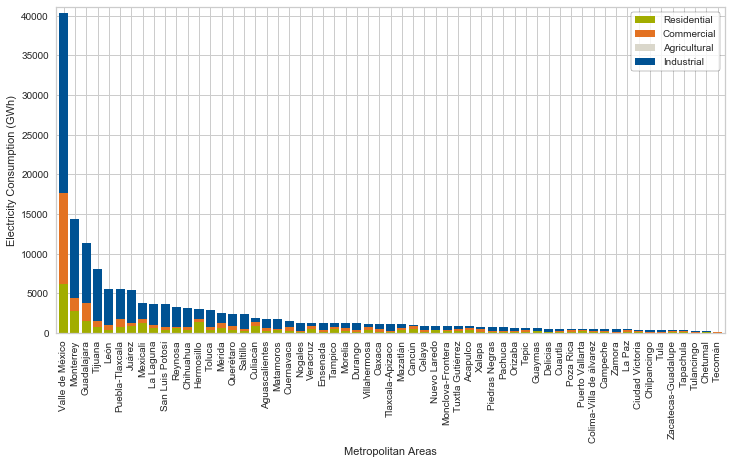

In [36]:
summ_total_sort = summary_total.sort_values(by=['total_kwh_y'], ascending=False)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
p1 = ax.bar(summ_total_sort.NOM_ZM, summ_total_sort.RES_kWh_y, color="#A2AD00")  
p2 = ax.bar(summ_total_sort.NOM_ZM, summ_total_sort.COM_kWh_y, bottom=summ_total_sort.RES_kWh_y, color="#E37222")
p3 = ax.bar(summ_total_sort.NOM_ZM, summ_total_sort.AGR_kWh_y, bottom=summ_total_sort.RES_kWh_y+summ_total_sort.COM_kWh_y, color="#DAD7CB")
p4 = ax.bar(summ_total_sort.NOM_ZM, summ_total_sort.IND_kWh_y, bottom=summ_total_sort.RES_kWh_y+summ_total_sort.COM_kWh_y+summ_total_sort.AGR_kWh_y, color="#005293")


# we also need to switch the labels
ax.set_ylabel('Electricity Consumption (GWh)')
ax.set_xlabel('Metropolitan Areas')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Residential', 'Commercial', 'Agricultural', 'Industrial'), loc=0, frameon=True, edgecolor='black')
plt.margins(x=0.005) #0.005
plt.margins(y=0.02) #0.005

plt.xticks(rotation='vertical')


plt.savefig(r'D:\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\img\python\spatial\stacked_bar_hor.png', format='png', bbox_inches='tight')
plt.show()  

In [35]:
6936504648/1000000

6936.504648

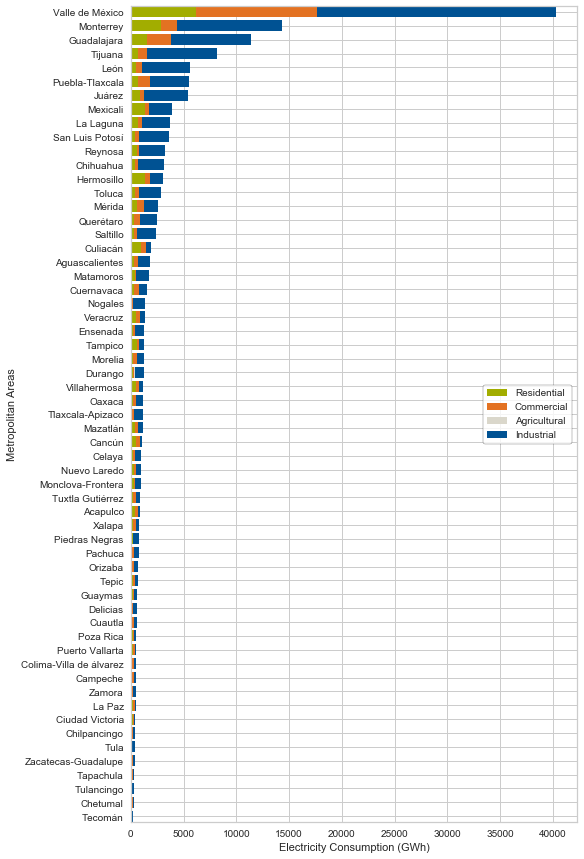

In [13]:
summ_total_sort = summary_total.sort_values(by=['total_kwh_y'])
summ_total_sort.iloc[:,4:] = summ_total_sort.iloc[:,4:]/1000000

fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(1, 1, 1)
p1 = ax.barh(summ_total_sort.NOM_ZM, summ_total_sort.RES_kWh_y, color="#A2AD00")  
p2 = ax.barh(summ_total_sort.NOM_ZM, summ_total_sort.COM_kWh_y, left=summ_total_sort.RES_kWh_y, color="#E37222")
p3 = ax.barh(summ_total_sort.NOM_ZM, summ_total_sort.AGR_kWh_y, left=summ_total_sort.RES_kWh_y+summ_total_sort.COM_kWh_y, color="#DAD7CB")
p4 = ax.barh(summ_total_sort.NOM_ZM, summ_total_sort.IND_kWh_y, left=summ_total_sort.RES_kWh_y+summ_total_sort.COM_kWh_y+summ_total_sort.AGR_kWh_y, color="#005293")


# we also need to switch the labels
ax.set_xlabel('Electricity Consumption (GWh)')
ax.set_ylabel('Metropolitan Areas')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Residential', 'Commercial', 'Agricultural', 'Industrial'), loc=7, frameon=True, edgecolor='black')
plt.margins(y=0) #0.005

#plt.savefig(r'D:\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\img\python\spatial\stacked_bar.eps', format='eps', bbox_inches='tight')
plt.show()  

### Map

In [ ]:
ZM_map = gpd.read_file('/Tesis/Datos/shapefiles/ZM/ZM.shp')
ZM_map = ZM_map.merge(summary_total[['CVE_ZM','total_kwh_y','pobtot']], on='CVE_ZM', how='right')
ZM_map['total_kwh_y'] = ZM_map['total_kwh_y']/1000000

In [ ]:
X = ZM_map[['pobtot']]
names = X.columns.to_list()
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
ZM_map[['pobtot']] = df_mm

In [ ]:
ZM_map.to_file(r'\Tesis\Output\Shapes\resultados.shp')
ZM_map['total_kwh_y'] = ZM_map['total_kwh_y']/1000000
ZM_map.head()

### Summary electricity in economic sectors

In [14]:
# Compute population, energy, and economic indexes
sum_economic = summary_total.copy()

sum_economic['res_p_cap'] = sum_economic['RES_kWh_y']/sum_economic['pobtot']
sum_economic['agr_p_cap'] = sum_economic['AGR_kWh_y']/sum_economic['pobtot']
sum_economic['com_p_cap'] = sum_economic['COM_kWh_y']/sum_economic['pobtot']
sum_economic['ind_p_cap'] = sum_economic['IND_kWh_y']/sum_economic['pobtot']

sum_economic.drop(sum_economic.columns.to_list()[4:10], axis=1, inplace=True)

In [15]:
sum_economic.head()

,CVE_ZM,NOM_ZM,pobtot,area,pop_density,res_p_cap,agr_p_cap,com_p_cap,ind_p_cap
0,1.01,Aguascalientes,820619.0,1.075347e+08,0.007631,0.000350,5.007254e-07,0.000443,0.001380
1,2.01,Ensenada,393291.0,1.044661e+08,0.003765,0.000479,5.032291e-05,0.000556,0.002185
2,2.02,Mexicali,832929.0,1.886550e+08,0.004415,0.001594,3.015134e-06,0.000500,0.002538
3,2.03,Tijuana,1655209.0,2.757396e+08,0.006003,0.000431,4.536157e-07,0.000468,0.004010
4,3.01,La Paz,222709.0,6.542805e+07,0.003404,0.000803,9.281800e-06,0.000889,0.000424


# Clusters
## Economic Activities

In [16]:
# Variables
#X = sum_economic[['com_p_cap','ind_p_cap']]
X = sum_economic[['res_p_cap','agr_p_cap','com_p_cap','ind_p_cap']]
range_n_clusters = [2, 3, 4, 5, 6]

In [17]:
# Standarize
names = X.columns.to_list()
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C5857EA58>,
         k=None, metric=None, model=None, timings=True)

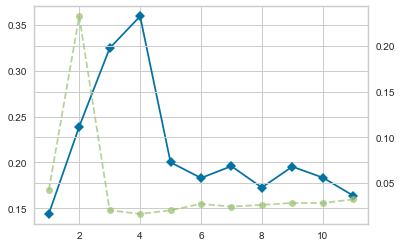

In [18]:
model = KMeans()
#model.fit(X)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer

In [19]:
silhouette_visualizer(range_n_clusters, X)

For n_clusters = 2 The average silhouette_score is : 0.3822313349584969
For n_clusters = 3 The average silhouette_score is : 0.38987396811839176
For n_clusters = 4 The average silhouette_score is : 0.3871567064571574
For n_clusters = 5 The average silhouette_score is : 0.38425137261753106
For n_clusters = 6 The average silhouette_score is : 0.37429926042691536


In [20]:
n = 4 # number of clusters

kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [21]:
clus = sum_economic.copy()
clus['cluster_sector'] = labels

clus = clus.sort_values(by='cluster_sector')
col = clus.columns.to_list()
clus = clus[col[0:2]+[col[-1]]+col[2:-1]]
X['target'] = labels

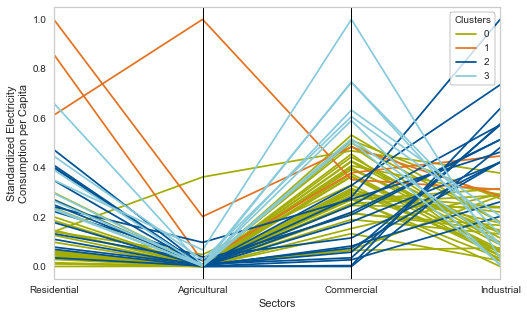

In [22]:
X = X.sort_values(by='target')
X.columns= ['Residential','Agricultural','Commercial','Industrial','target']

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

pd.plotting.parallel_coordinates(X[['target','Residential','Agricultural','Commercial','Industrial']], 
                                 'target', color=["#A2AD00", "#E37222", "#005293","c"], ax=ax)
plt.legend(loc=0, frameon=True, edgecolor='black', title="Clusters")
ax.set_xlabel('Sectors')
ax.set_ylabel('Standardized Electricity\nConsumption per Capita')

#plt.savefig(r'D:\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\img\python\spatial\parallel.eps', format='eps', bbox_inches='tight')
plt.show()  

In [23]:
clus

,CVE_ZM,NOM_ZM,cluster_sector,pobtot,area,pop_density,res_p_cap,agr_p_cap,com_p_cap,ind_p_cap
0,1.01,Aguascalientes,0,820619.0,1.075347e+08,0.007631,0.000350,5.007254e-07,0.000443,0.001380
24,13.02,Tula,0,153726.0,7.729067e+07,0.001989,0.000326,5.774625e-09,0.000422,0.001725
25,13.03,Tulancingo,0,181196.0,6.524292e+07,0.002777,0.000279,0.000000e+00,0.000382,0.000925
26,14.01,Guadalajara,0,4336572.0,5.369446e+08,0.008076,0.000356,1.596001e-07,0.000518,0.001742
28,15.02,Toluca,0,1173723.0,3.692496e+08,0.003179,0.000337,3.560184e-09,0.000359,0.001755
30,16.03,Zamora,0,224125.0,3.526036e+07,0.006356,0.000327,1.256481e-06,0.000448,0.001483
31,17.01,Cuautla,0,335634.0,9.201208e+07,0.003648,0.000330,1.107018e-07,0.000540,0.000840
32,17.02,Cuernavaca,0,833059.0,1.766679e+08,0.004715,0.000359,4.522922e-08,0.000530,0.000969
33,18.01,Tepic,0,382481.0,4.734748e+07,0.008078,0.000457,8.162906e-09,0.000513,0.000703
35,20.01,Oaxaca,0,568827.0,1.435921e+08,0.003961,0.000312,7.258557e-09,0.000576,0.001169


### Create a shapefile with the geographic location of the clustered cities

## Población y energía 

In [26]:
X = summary_total[['pop_density','ELE_p_capita']]
range_n_clusters = [2, 3, 4, 5, 6]

In [27]:
names = X.columns.to_list()
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

In [84]:
silhouette_visualizer(range_n_clusters, X)

For n_clusters = 2 The average silhouette_score is : 0.42512684682421836
For n_clusters = 3 The average silhouette_score is : 0.4408459541611086
For n_clusters = 4 The average silhouette_score is : 0.42140073322258675
For n_clusters = 5 The average silhouette_score is : 0.40505493948267285
For n_clusters = 6 The average silhouette_score is : 0.3736939748523354


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002B783C73320>,
         k=None, metric=None, model=None, timings=True)

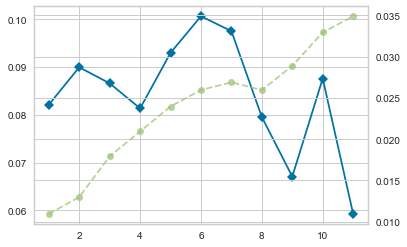

In [85]:
model = KMeans()
#model.fit(X)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer

In [86]:
n = 3 # number of clusters


kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [87]:
clus_sum = summary_total.copy()
clus_sum['cluster_pop'] = labels

clus_sum = clus_sum.sort_values(by='cluster_pop')
col = clus_sum.columns.to_list()
clus_sum = clus_sum[col[0:2]+[col[-1]]+col[2:-1]]

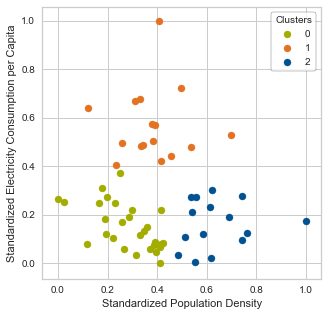

In [88]:
X['clus'] = labels

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

color_theme = np.array(["#A2AD00", "#E37222", "#005293"])
for clus in range(0,3):
    ax.scatter(X.loc[X.clus==clus,'pop_density'], X.loc[X.clus==clus,'ELE_p_capita'], c=color_theme[clus], s=50, label=clus)


# from adjustText import adjust_text
# texts = []
# for i in range(summary_zm.shape[0]):
#     texts.append(plt.annotate(summary_zm['CVE_ZM'].tolist()[i], (x.tolist()[i], y.tolist()[i])))
# adjust_text(texts) 

ax.legend(loc=0, frameon=True, edgecolor='black', title="Clusters")
ax.set_xlabel('Standardized Population Density')
ax.set_ylabel('Standardized Electricity Consumption per Capita')

#plt.savefig(r'D:\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\img\python\spatial\cluster_pop.eps', format='eps', bbox_inches='tight')
plt.show()  

In [90]:
clus_sum

,CVE_ZM,NOM_ZM,cluster_pop,pobtot,area,RES_kWh_y,AGR_kWh_y,COM_kWh_y,IND_kWh_y,total_kwh_y,ELE_p_capita,pop_density
23,13.01,Pachuca,0,437351.0,1.284103e+08,1.330028e+08,4.142646e+03,1.734636e+08,4.826047e+08,7.890752e+08,1804.214856,0.003406
22,12.02,Chilpancingo,0,245579.0,4.835335e+07,6.801466e+07,1.697028e+02,1.296999e+08,1.852067e+08,3.829214e+08,1559.259595,0.005079
24,13.02,Tula,0,153726.0,7.729067e+07,5.003787e+07,8.877100e+02,6.486573e+07,2.651047e+08,3.800092e+08,2471.990248,0.001989
25,13.03,Tulancingo,0,181196.0,6.524292e+07,5.047138e+07,0.000000e+00,6.914820e+07,1.676876e+08,2.873072e+08,1585.615487,0.002777
53,30.05,Orizaba,0,354769.0,7.333958e+07,1.164795e+08,8.580833e+02,1.619648e+08,4.095836e+08,6.880288e+08,1939.371160,0.004837
27,14.03,Puerto Vallarta,0,346687.0,6.561195e+07,2.140321e+08,1.002445e+05,2.191656e+08,9.689549e+07,5.301934e+08,1529.314423,0.005284
28,15.02,Toluca,0,1173723.0,3.692496e+08,3.955534e+08,4.178669e+03,4.209933e+08,2.059707e+09,2.876258e+09,2450.542219,0.003179
57,31.01,Mérida,0,985972.0,2.845395e+08,6.157126e+08,2.073920e+05,6.494662e+08,1.277674e+09,2.543060e+09,2579.241971,0.003465
21,12.01,Acapulco,0,717374.0,1.358446e+08,3.503851e+08,9.955897e+03,3.127479e+08,1.826352e+08,8.457782e+08,1178.991986,0.005281
52,29.01,Tlaxcala-Apizaco,0,438028.0,2.470598e+08,1.139450e+08,2.231563e+04,1.888169e+08,8.156875e+08,1.118472e+09,2553.425200,0.001773


### Create a shapefile with the geographic location of the clustered cities

## Demografía y energía 

In [34]:
summary_zm

,CVE_ZM,NOM_ZM,Summer,pobtot,tothog,tot_integ,IMU,nivelaprob,ocupados,h_m_sexo,ma_me_edad,edad,Res_consumption_mensual_hogar,Res_consumption_a,area,empl_AGR,empl_COM,empl_IND,empl_TOT,ele_AGR,ele_COM,ele_IND,ele_TOT
0,1.01,Aguascalientes,20.336115,820619.0,207481.0,3.869706,-0.708773,9.991366,0.396936,-0.032662,0.279272,29.210808,114.418926,2.872939e+08,1.075347e+08,42.0,284684.0,81027.0,365753.0,4.109047e+05,3.631939e+08,1.132271e+09,1.495876e+09
1,2.01,Ensenada,23.148775,393291.0,111296.0,3.487870,-0.066067,8.700628,0.422508,-0.004119,0.299170,30.639713,138.981125,1.884972e+08,1.044661e+08,5351.0,123155.0,62610.0,191116.0,1.979155e+07,2.185129e+08,8.593944e+08,1.097699e+09
2,2.02,Mexicali,28.126219,832929.0,233775.0,3.417169,-0.672974,9.607243,0.411656,0.006652,0.323168,31.738700,468.571479,1.327959e+09,1.886550e+08,679.0,244600.0,136775.0,382054.0,2.511393e+06,4.164315e+08,2.113719e+09,2.532662e+09
3,2.03,Tijuana,21.304216,1655209.0,450076.0,3.566376,-0.430051,9.207003,0.426140,0.001916,0.298669,29.720170,130.885463,7.140604e+08,2.757396e+08,203.0,436264.0,379532.0,815999.0,7.508287e+05,7.743307e+08,6.637447e+09,7.412528e+09
4,3.01,La Paz,26.339452,222709.0,63695.0,3.349774,-0.726931,10.138824,0.421955,-0.004950,0.364603,32.079793,223.559447,1.788688e+08,6.542805e+07,550.0,94494.0,10242.0,105286.0,2.067140e+06,1.979090e+08,9.437723e+07,2.943534e+08
5,4.01,Campeche,27.781306,224906.0,62712.0,3.514791,-0.437899,10.000492,0.434025,-0.034885,0.386608,31.778084,198.496844,1.511020e+08,5.219588e+07,762.0,103140.0,23986.0,127888.0,2.330776e+05,1.639351e+08,2.063003e+08,3.704684e+08
6,5.01,La Laguna,25.337367,1093549.0,284708.0,3.712236,-0.486382,9.489672,0.361914,-0.020418,0.277579,30.725307,185.949365,6.629912e+08,2.058361e+08,552.0,342126.0,146060.0,488738.0,5.846135e+06,3.661127e+08,2.640709e+09,3.012668e+09
7,5.02,Monclova-Frontera,27.201220,329849.0,88497.0,3.620867,-0.551682,9.540163,0.361449,-0.002622,0.312723,31.040220,264.399848,2.908229e+08,1.007200e+08,9.0,85955.0,40620.0,126584.0,9.778981e+04,1.036543e+08,5.246782e+08,6.284303e+08
8,5.03,Piedras Negras,29.379930,176892.0,48675.0,3.513996,-0.491510,8.786866,0.353870,0.000088,0.253135,30.739909,300.573570,1.760002e+08,6.312806e+07,9.0,45812.0,41271.0,87092.0,9.778981e+04,5.284676e+07,5.622536e+08,6.151982e+08
9,5.04,Saltillo,22.388148,782302.0,200739.0,3.749061,-0.695407,10.076548,0.377025,-0.009029,0.279625,29.756064,122.690357,2.988340e+08,2.001417e+08,67.0,222497.0,146811.0,369375.0,7.279908e+05,2.417954e+08,1.884617e+09,2.127141e+09


In [29]:
sum_demo = summary_zm[summary_zm.columns.to_list()[:12]].copy()
sum_demo['ELE_p_capita'] = summary_total['ELE_p_capita']
#sum_demo['pop_density'] = summary_total['pop_density']
sum_demo.head()

,CVE_ZM,NOM_ZM,Summer,pobtot,tothog,tot_integ,IMU,nivelaprob,ocupados,h_m_sexo,ma_me_edad,edad,ELE_p_capita
0,1.01,Aguascalientes,20.336115,820619.0,207481.0,3.869706,-0.708773,9.991366,0.396936,-0.032662,0.279272,29.210808,2172.957196
1,2.01,Ensenada,23.148775,393291.0,111296.0,3.487870,-0.066067,8.700628,0.422508,-0.004119,0.299170,30.639713,3270.341994
2,2.02,Mexicali,28.126219,832929.0,233775.0,3.417169,-0.672974,9.607243,0.411656,0.006652,0.323168,31.738700,4634.994879
3,2.03,Tijuana,21.304216,1655209.0,450076.0,3.566376,-0.430051,9.207003,0.426140,0.001916,0.298669,29.720170,4909.705581
4,3.01,La Paz,26.339452,222709.0,63695.0,3.349774,-0.726931,10.138824,0.421955,-0.004950,0.364603,32.079793,2124.845426


In [30]:
X = sum_demo[['IMU','tot_integ','nivelaprob','edad','ELE_p_capita']] #'tot_integ','IMU','nivelaprob','edad','ELE_p_capita'
range_n_clusters = [2, 3, 4, 5, 6]

In [31]:
names = X.columns.to_list()
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

In [94]:
silhouette_visualizer(range_n_clusters, X)

For n_clusters = 2 The average silhouette_score is : 0.27454821251781936
For n_clusters = 3 The average silhouette_score is : 0.23421771132672153
For n_clusters = 4 The average silhouette_score is : 0.2311774270267107
For n_clusters = 5 The average silhouette_score is : 0.2318890119445146
For n_clusters = 6 The average silhouette_score is : 0.22285197938808896


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002B783BF3CC0>,
         k=None, metric=None, model=None, timings=True)

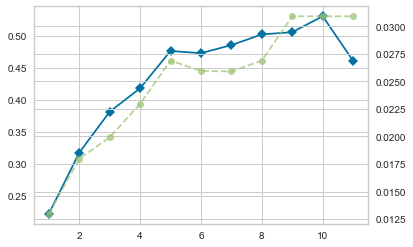

In [95]:
model = KMeans()
#model.fit(X)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer

In [133]:
n = 3 # number of clusters

kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [134]:
clus_sum = sum_demo.copy()
clus_sum['cluster_demo'] = labels

clus_sum = clus_sum.sort_values(by='cluster_demo')
col = clus_sum.columns.to_list()
clus_sum = clus_sum[col[0:2]+[col[-1]]+col[2:-1]]

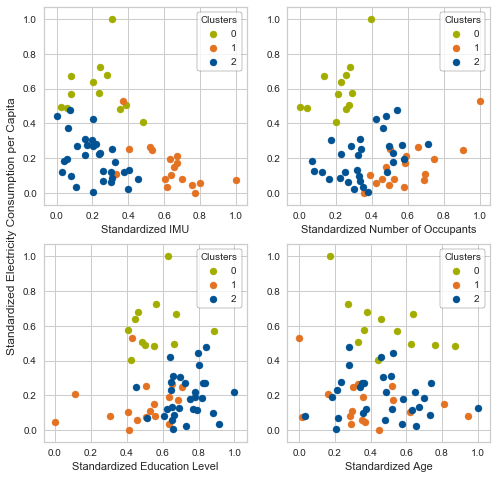

In [137]:
X['clus'] = labels
var = ['IMU','tot_integ','nivelaprob','edad']
xlabel = ['IMU','Number of Occupants','Education Level','Age']
color_theme = np.array(["#A2AD00", "#E37222", "#005293"])

fig, axes = plt.subplots(2,2, figsize=(8,8))
axes = list(axes.flat)

for ax in range(0,4):
    for clus in range(0,3):
        axes[ax].scatter(X.loc[X.clus==clus,var[ax]], X.loc[X.clus==clus,'ELE_p_capita'], c=color_theme[clus], s=50, label=clus)
    
    axes[ax].legend(loc=0, frameon=True, edgecolor='black', title="Clusters")
    axes[ax].set_xlabel('Standardized '+xlabel[ax])
    #axes[ax].set_ylabel('Standardized Electricity Consumption per Capita')
    
fig.text(0.07,0.5, "Standardized Electricity Consumption per Capita", ha="center", va="center", rotation=90, fontsize=12)

#plt.savefig(r'D:\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\img\python\spatial\cluster_demo.eps', format='eps', bbox_inches='tight')
plt.show()  

In [136]:
clus_sum

,CVE_ZM,NOM_ZM,cluster_demo,Summer,pobtot,tothog,tot_integ,IMU,nivelaprob,ocupados,h_m_sexo,ma_me_edad,edad,ELE_p_capita
14,8.01,Chihuahua,0,22.988411,831098.0,238919.0,3.283165,-0.758569,9.575085,0.387026,-0.021945,0.315366,31.679738,3737.433415
48,28.02,Matamoros,0,28.791328,455800.0,122970.0,3.559586,-0.207876,8.914450,0.375300,-0.011433,0.268972,30.032687,3777.898035
44,26.02,Hermosillo,0,29.850151,750364.0,205778.0,3.500337,-0.672236,10.371337,0.414122,-0.007512,0.331060,31.244785,4114.328237
43,26.01,Guaymas,0,30.012298,169807.0,46763.0,3.541014,-0.265083,9.159837,0.385287,-0.005776,0.342698,33.037485,3678.070719
50,28.04,Reynosa,0,29.078834,692605.0,186895.0,3.541949,-0.369729,8.849916,0.386444,-0.004104,0.252596,30.288157,4669.737465
16,8.04,Juárez,0,26.844359,1318168.0,344342.0,3.575320,-0.434265,8.648794,0.366114,0.001934,0.217248,30.218250,4135.013992
15,8.02,Delicias,0,26.303750,155812.0,44600.0,3.321458,-0.708972,8.991420,0.393773,-0.015710,0.339179,32.424214,3700.236145
8,5.03,Piedras Negras,0,29.379930,176892.0,48675.0,3.513996,-0.491510,8.786866,0.353870,0.000088,0.253135,30.739909,4472.776650
45,26.03,Nogales,0,24.564544,211303.0,55005.0,3.683631,-0.331624,9.457659,0.387121,-0.002914,0.227674,29.157288,6338.097068
2,2.02,Mexicali,0,28.126219,832929.0,233775.0,3.417169,-0.672974,9.607243,0.411656,0.006652,0.323168,31.738700,4634.994879


### Create a shapefile with the geographic location of the clustered cities


### Regression's coefficients

In [396]:
coeff = pd.read_pickle(pkls + 'ZM_coeff.pkl')

In [397]:
ZM_2015 = pd.read_pickle(pkls + 'ZM_2015.pkl')
ZM_2015_uniq = ZM_2015.drop_duplicates(subset='CVE_ZM')

coef = coeff.merge(ZM_2015_uniq[['CVE_ZM','NOM_ZM']], on='CVE_ZM', how='left')
col = coef.columns.to_list()
col = col[0:1]+col[-1:]+col[1:-1]
coef = coef[col]

In [398]:
df = coef.iloc[:,4:]
df.columns = ['Occupants','Temperature','Employees','IMU','Age','Education','Gender','Age ratio']
df = df[['Occupants','Education','Age','IMU','Age ratio','Gender','Temperature','Employees']]

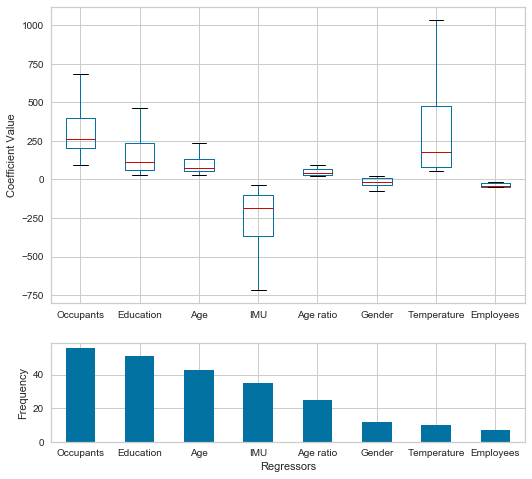

In [400]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2,figsize=(8.5,8), gridspec_kw={'height_ratios': [3, 1]})
df.boxplot(showfliers=False, ax=axarr[0])
df.count().plot.bar(x='lab', y='val', rot=0, ax=axarr[1])
axarr[0].set(ylabel="Coefficient Value")
axarr[1].set(xlabel='Regressors', ylabel='Frequency')

#plt.savefig(r'D:\Tesis\tum-ei-ens-thesis-bundle-2018-05\thesis-latex\img\python\spatial\boxplot_coef.eps', format='eps', bbox_inches='tight')
